In [1]:
#Student Number         : 21930156
#Surname                : Ngubane
#First Name(s)          : Thabiso

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# LOAD DATA & GENERATE STATS

In [3]:
#Loading the Laptops.csv dataset into a dataframe
df = pd.read_csv('Laptops.csv')

In [4]:
Showing the full df
df

,Row_ID,Company,Type,Inches,ScreenRes,CPU,RAM_GB,Storage,GPU,OS,Weight_G,Weight_KG,Rating
0,R1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1370,1.37,Above
1,R2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1340,1.34,Below
2,R3,HP,NaN,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1860,1.86,Below
3,R4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1830,1.83,Above
4,R5,Apple,Ultrabook,NaN,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1370,1.37,Above
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,R1 299,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1800,1.80,Below
1299,R1 300,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1300,1.30,Above
1300,R1 301,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1500,1.50,Below
1301,R1 302,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2190,2.19,Below


In [5]:
#Showing the first 10 rows of the dataframe
df.head(10)

,Row_ID,Company,Type,Inches,ScreenRes,CPU,RAM_GB,Storage,GPU,OS,Weight_G,Weight_KG,Rating
0,R1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1370,1.37,Above
1,R2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1340,1.34,Below
2,R3,HP,NaN,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1860,1.86,Below
3,R4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1830,1.83,Above
4,R5,Apple,Ultrabook,NaN,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1370,1.37,Above
5,R6,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4.0,500GB HDD,AMD Radeon R5,Windows 10,2100,2.10,Below
6,R7,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16.0,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2040,2.04,Above
7,R8,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,256GB Flash Storage,Intel HD Graphics 6000,macOS,1340,1.34,Above
8,R9,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16.0,512GB SSD,Nvidia GeForce MX150,Windows 10,1300,1.30,Above
9,R10,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,256GB SSD,Intel UHD Graphics 620,Windows 10,1600,1.60,Below


In [6]:
#Showing last 5 rows of the dataframe
df.tail()


,Row_ID,Company,Type,Inches,ScreenRes,CPU,RAM_GB,Storage,GPU,OS,Weight_G,Weight_KG,Rating
1298,R1 299,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1800,1.80,Below
1299,R1 300,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1300,1.30,Above
1300,R1 301,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1500,1.50,Below
1301,R1 302,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2190,2.19,Below
1302,R1 303,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4.0,500GB HDD,Intel HD Graphics,Windows 10,2200,2.20,Below


In [7]:
#Generating descriptive statistics (count/mean/std dev/min/max etc) of the numeric data
df.describe()


,Inches,RAM_GB,Weight_G,Weight_KG
count,1298.000000,1297.000000,1303.000000,1303.000000
mean,15.018413,8.377795,2038.733691,2.038734
std,1.425679,5.091969,665.474600,0.665475
min,10.100000,2.000000,690.000000,0.690000
25%,14.000000,4.000000,1500.000000,1.500000
50%,15.600000,8.000000,2040.000000,2.040000
75%,15.600000,8.000000,2300.000000,2.300000
max,18.400000,64.000000,4700.000000,4.700000


In [8]:
#Observations can you make about the descriptive statistics generated

#1. Screen Size (Inches)
#Left-Skewed Distribution:
#Mean (15.0) < Median (15.6) - More laptops have screen sizes above the mean, 
#indicating a cluster of larger screens (e.g., 15.6" being an industry standard).
#Low std (1.43): Tight clustering around 15.6", with limited variability except for outliers.
#Market Segmentation:
#75th percentile = 15.6": Over 75% of laptops have screens ≤15.6", suggesting this size dominates
#mainstream demand.
#Range: The minimum value is 10.1 inches, and the maximum is 18.4 inches, showing that there are
#laptops with both very compact screens and larger,possibly gaming or professional models.

#2. RAM (RAM_GB)
#Right-Skewed Distribution:
#Mean (8.38) > Median (8.0) - High-RAM outliers (e.g., 64GB) pull the mean upward.
#Standard Deviation (std): A relatively high standard deviation of 5.09 GB indicates a wide range in RAM sizes, 
#from as low as 2 GB to a maximum of 64 GB, reflecting the presence of both budget and high-performance models.
#Min and Max: A minimum of 2 GB suggests budget or older models, while 64 GB is likely to be found in very high-end machines, such as workstations.

#3. Weight (Weight_G and Weight_KG)
#Redundancy Confirmed:
#Weight_G and Weight_KG are exact unit conversions (e.g., 2038.73g ≈ 2.04kg).
#Mean: The average weight is about 2.04 kg, which is typical for mid-range laptops. The range between the minimum (690 g) and maximum (4700 g)
#indicates a mix of ultra-lightweight laptops and much heavier, possibly gaming laptops or workstations.
#Standard Deviation (std): A high standard deviation (665.47 g) suggests a significant variance in the weight of the laptops. 
#This is likely due to the mix of ultrabooks, which are lighter, and gaming or workstation models that are considerably heavier.
#Min and Max: The extreme minimum and maximum values (690 g to 4700 g) support the idea of different laptop categories, 
#such as ultraportables and high-performance devices.
#Outliers:
#0.69kg: Ultraportables (e.g., LG Gram) targeting mobility-focused users.
#4.7kg: Heavy gaming/workstation laptops (e.g., Alienware).

#4. Missing Values (Pre-Imputation)
#Inches (5 missing) and RAM_GB (6 missing):
#Count of Data: The column 'Inches' has a count of 1298 entries, which suggests some missing data, though it’s relatively minimal.
#RAM_GB: There is a slight discrepancy with one entry missing data (1297 instead of 1298),
#which might reflect an entry that didn't have valid RAM information.
#Weight: The Weight_G and Weight_KG columns have full data (1303 entries), showing no missing values. 
#This consistency in the dataset suggests that these features were correctly recorded for all laptops.

#5. Business Insights
#Market Trends:
#Dominance of 15.6" screens and 8GB RAM reflects mainstream consumer preferences.
#High-RAM/heavy laptops signal a growing gaming/workstation niche.

#6  Percentiles:
#25th Percentile: The values at the 25th percentile show that 25% of the laptops are lighter (in weight) and have smaller screens (around 14 inches).
#Similarly, RAM is around 4 GB, indicating the prevalence of budget or entry-level models in the lower quartile.
#50th Percentile (Median): The median shows that 50% of laptops are around 15 inches in screen size and have 6 GB of RAM.
#These represent the mid-range laptop specifications.
#75th Percentile: By the 75th percentile, laptops tend to have 8 GB of RAM, a 15-inch screen, and a weight of approximately 2.3 kg,
#indicating that 75% of laptops are in the upper mid-range to high-end segment.


In [9]:
#Generating info showing each feature, the number of non-null values and the datatype of each feature
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Row_ID     1303 non-null   object 
 1   Company    1300 non-null   object 
 2   Type       1298 non-null   object 
 3   Inches     1298 non-null   float64
 4   ScreenRes  1301 non-null   object 
 5   CPU        1303 non-null   object 
 6   RAM_GB     1297 non-null   float64
 7   Storage    1301 non-null   object 
 8   GPU        1303 non-null   object 
 9   OS         1292 non-null   object 
 10  Weight_G   1303 non-null   int64  
 11  Weight_KG  1303 non-null   float64
 12  Rating     1303 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


In [10]:
#Observations about the info generated

#Data Completeness (Non-Null Count):
#Row_ID and Rating columns have no missing values, as they have 1303 non-null entries, 
#which likely indicates that each entry in the dataset has a unique identifier and a rating assigned.
#Columns such as RAM_GB, Inches, Type, and Storage have a slightly lower non-null count (1297-1298). 
#This suggests that these fields have a small number of missing values, which could potentially affect analyses
#if the missing data is not handled properly.
#ScreenRes, CPU, GPU, and OS have relatively complete data with 1300-1303 non-null entries, 
#suggesting that these attributes are mostly available for all laptops in the dataset.

#Data Types (Dtype):
#Object types (e.g., Row_ID, Company, Type, ScreenRes, CPU, GPU, OS, Rating) are mostly categorical variables. 
#These columns represent qualitative attributes such as company name, type of laptop, CPU, GPU, and operating system. 
#Float64 and Int64 types are used for continuous or numerical features. 
#These columns (e.g., Inches, RAM_GB, Storage, Weight_G, Weight_KG) can be directly used for modeling. 

#Potential for Data Cleaning:
#Inches and RAM_GB have a slight reduction in non-null counts (1298 and 1297, respectively).
#This show that there might be some missing data that needs to be handled, possibly through imputation or removal of rows with missing values,
#depending on the analysis approach.
#The Storage column is mostly complete but might require validation since it may contains categorical values such as "HDD" and "SSD,"
#which will need to be encoded numerically for machine learning.

#The Rating column, being an object, likely contains categorical ratings (e.g., "High", "Medium", "Low"), 
#but it may need to be converted into a numerical form for certain modeling techniques.

#Column-Specific Notes:
#Row_ID is a unique identifier, so it is not useful for predictive modeling. It could be excluded from the feature set when creating models.
#Company, Type, ScreenRes, CPU, GPU, and OS are likely important features for identifying patterns in laptop specifications, 
#such as how different brands or types of laptops perform based on their technical specifications.
#RAM_GB, Storage, Weight_G, and Inches are continuous variables and are often key features used to assess laptop performance or classify 
#laptops into different segments (e.g., budget, mid-range, premium).
#Weight_KG seems to be a straightforward numerical feature that can be used to understand the weight distribution of laptops in the dataset.

#Memory Usage:
#The dataset's memory usage is 132.5 KB, which is relatively small. Given the dataset has 1303 entries with 13 columns, 
#it suggests the data is fairly compact and should be easy to handle in terms of memory for analysis or modeling tasks.


#Missing values in some columns may need to be addressed by using imputation techniques or by removing rows that have incomplete data, 
#depending on the analysis goal.

#Some categorical columns (such as Type, Company, CPU, GPU, OS) may require encoding to transform them into numerical values, 
#which is necessary for feeding the data into machine learning algorithms.

#Given that Rating is an object type, it likely represents categories (e.g., ratings like 'Excellent', 'Good', 'Fair').
#It might need to be converted to numeric values through techniques like label encoding or one-hot encoding.

# PREPROCESSING

In [11]:
#Generating a list showing each feature and the the total number of null or missing values for that feature
df.isnull().sum()


Row_ID        0
Company       3
Type          5
Inches        5
ScreenRes     2
CPU           0
RAM_GB        6
Storage       2
GPU           0
OS           11
Weight_G      0
Weight_KG     0
Rating        0
dtype: int64

In [12]:
#Filling the missing values for all numerical features with the mean. 
# Selecting numerical columns (int64/float64) and fill missing values with their respective means
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())



In [13]:
#Filling the missing values for all categorical features with the mode. 
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [14]:
#Generating a list showing each feature and the the total number of null or missing values for that feature
df.isnull().sum()


Row_ID       0
Company      0
Type         0
Inches       0
ScreenRes    0
CPU          0
RAM_GB       0
Storage      0
GPU          0
OS           0
Weight_G     0
Weight_KG    0
Rating       0
dtype: int64

In [15]:
#Observations about the list generated

#Complete Null Elimination:
#All features now show 0 missing values, confirming successful imputation (mean for numerical, mode for categorical).

#Implications of Mean Imputation:
#For skewed numerical features (e.g., RAM_GB with max 64GB), using the mean may distort distributions or misrepresent typical values 
#(e.g., mean ≈8.38 vs. median=8).

#Categorical Mode Overrides Context:
#Filling OS (originally 11 missing) with the mode assumes missing entries align with the most frequent OS 
#(e.g., Windows), potentially masking valid edge cases (e.g., Linux/DOS users).

#Redundant Weight Columns:
#Both Weight_G and Weight_KG were filled, but retaining both adds redundancy. No analytical benefit to filling duplicates.

#Data Type Consistency:
#RAM_GB remains float64 post-imputation despite representing discrete values (e.g., 8.0 → 8). Loss of semantic accuracy by not converting to int64.

#Mode Selection Bias:
#For categorical features with tied modes (e.g., Type having equal counts for "Gaming" and "Ultrabook"), using .iloc[0] arbitrarily 
#selects the first mode, possibly misrepresenting the data.

#Loss of Missingness Signal:
#Overwriting missing values removes the ability to analyze patterns in missing data (e.g., whether missing OS correlates with specific Company or Type).

#Potential Over-imputation:
#Features like Row_ID (non-null initially) were unnecessarily included in the imputation process, 
#though no harm done. Highlights code efficiency gaps in column selection.

# EXPLORATORY DATA ANALYSIS (EDA)

# Categorical Features

In [16]:
#(1) Figure size 15x5
#(2) The categorical feature is on the x axis and Count on the y axis
#(3) Colour pallete is 'dark'

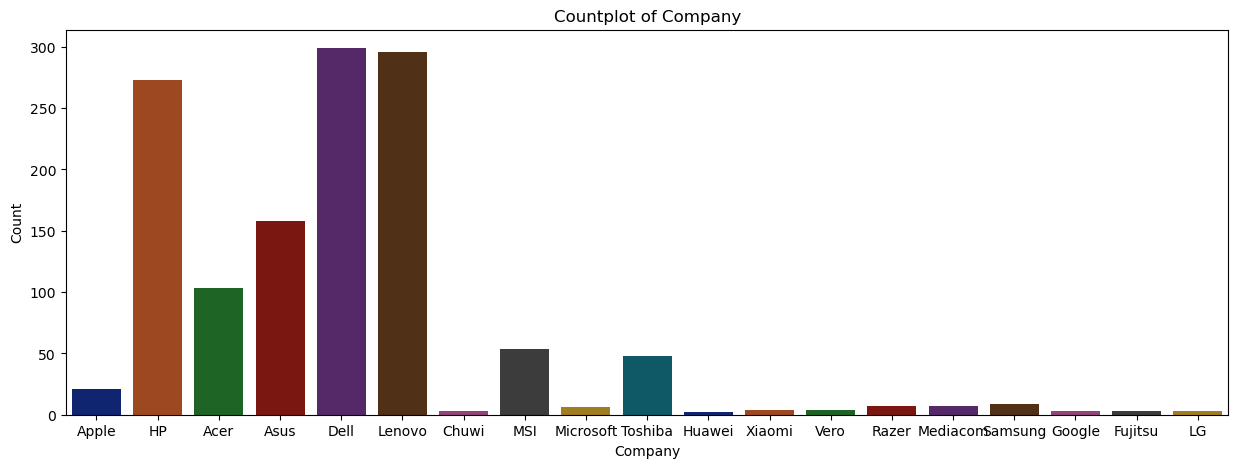

In [17]:
#Using seaborn to create a countplot of 'Company' using the given specifications.
plt.figure(figsize=(15, 5))
sns.countplot(x='Company', data=df, palette='dark')
plt.title('Countplot of Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

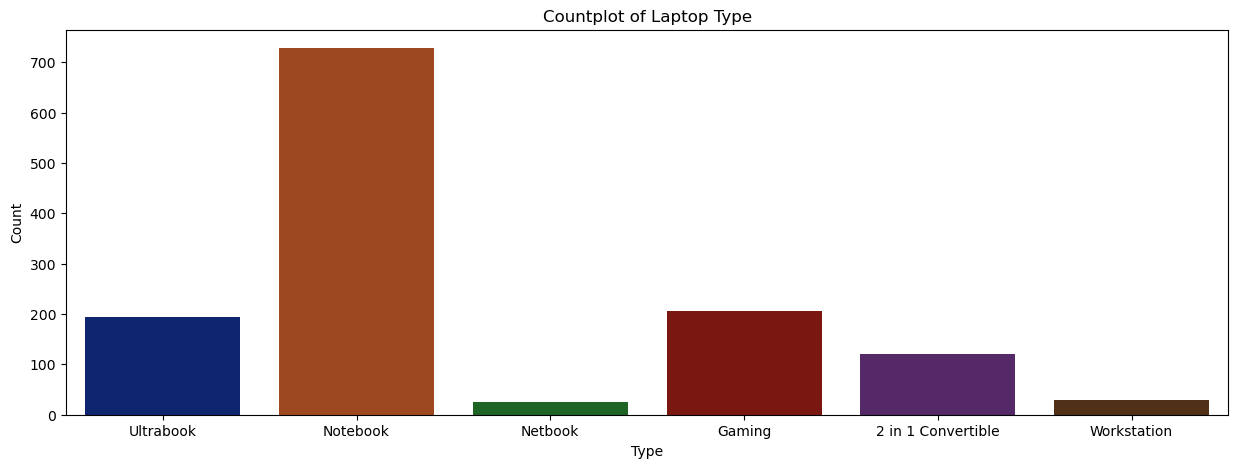

In [18]:
#Using seaborn to create a countplot of 'Type' using the given specifications.
plt.figure(figsize=(15, 5))
sns.countplot(x='Type', data=df, palette='dark')
plt.title('Countplot of Laptop Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

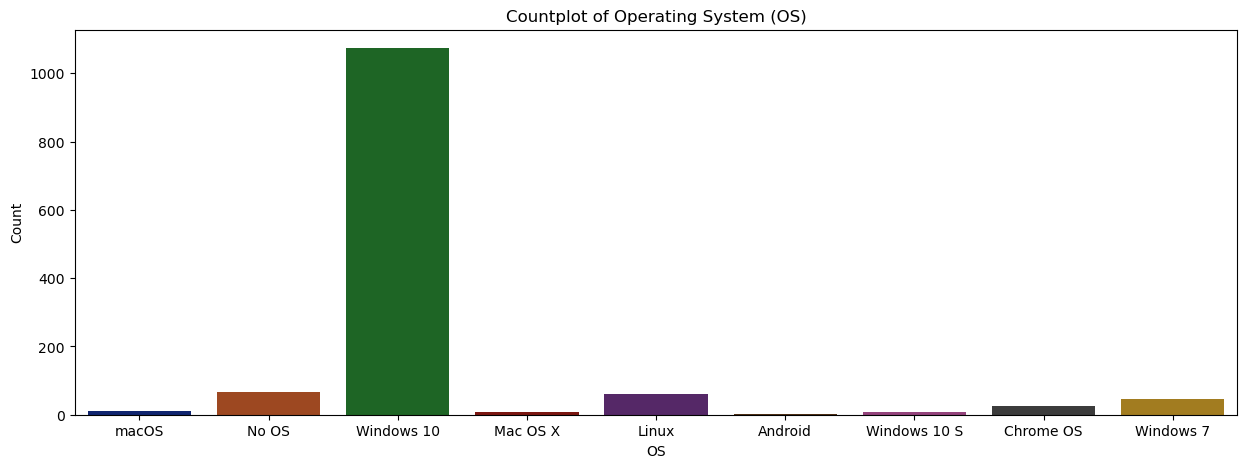

In [19]:
#Using seaborn to create a countplot of 'OS' using the given specifications.
plt.figure(figsize=(15, 5))
sns.countplot(x='OS', data=df, palette='dark')
plt.title('Countplot of Operating System (OS)')
plt.xlabel('OS')
plt.ylabel('Count')
plt.show()


In [20]:
#Observations about each of the countplots generated

#1. Company Countplot
#Market Dominance & Fragmentation:
#Dell, HP, and Lenovo dominate (250–300 counts), reflecting global market trends. However, the long-tail distribution 
#(e.g., Razer, Xiaomi, Vero with <50 counts) highlights niche players targeting specialized segments (e.g., gaming, budget devices).

#Data Quality Risks:
#"Google" entries likely represent Chromebooks, but their low count (~10) may underrepresent this segment.
#High-cardinality feature: Encoding strategies (e.g., frequency encoding) are needed to avoid dimensionality explosion.
#are brands may need grouping into "Other" to reduce noise.

#2. Type Countplot
#Mainstream vs. Niche Segmentation:
#Notebooks (600): Dominant due to general-purpose use, but their prevalence risks overshadowing niche categories in models.
#Gaming (200) & Workstation (30): Reflect performance-driven markets. Gaming laptops likely correlate with high-end GPUs 
#(e.g., NVIDIA RTX) and larger screens.
#Outdated Categories:
#"Netbook" (20): A relic of the 2000s; likely misclassified or outdated entries needing validation.
#"2-in-1 Convertible" (50): Low count suggests limited adoption despite industry hype.
#Class imbalance: Stratified sampling is critical to ensure rare types (e.g., Workstation) are represented in training.
#Type-OS Correlation: Ultrabooks (400) likely pair with Windows/macOS, while Gaming laptops correlate with Windows.

#3. OS Countplot
#Dominance of Windows 10 (~1000):
#Aligns with market trends but risks overshadowing minority OS categories (e.g., Linux, Chrome OS).
#"No OS" (25): Represents custom/enterprise devices, but missing OS info could bias models if not contextualized 
#(e.g., linking to Company like Apple or custom builds).

#Data Quality Issues:
#Typos: "maxOS" (macOS) and "Linux OS" (redundant "OS") indicate inconsistent labeling.
#Niche OS Categories:
#Chrome OS (50): Reflects Chromebooks but may be underrepresented.
#Android (10): Rare, likely tablets or hybrid devices (e.g., Lenovo Yoga).
#OS-Type Relationships: macOS devices are likely Ultrabooks (Apple MacBooks), while Linux may correlate with Workstations.

#Target Leakage Risk: If OS is determined post-purchase (e.g., user-installed), it may not be a true predictor of Rating.

#Cross-Plot Observations
#Data Entry Consistency:
#fragmented categories (e.g., "Windows 10" vs. "Windows 10 S") suggest poor data governance. Automated validation pipelines are needed.

#Feature Interaction:
#Company-Type-OS Triad: Dell/HP/Lenovo dominate Notebooks with Windows, while Apple Ultrabooks use macOS. Models must capture these interactions (e.g., via feature crossing).

#Class Imbalance:
#Rare categories (e.g., Workstation, Chrome OS) require techniques like SMOTE or stratified sampling to prevent model bias toward dominant classes.

In [21]:
#Displaying a count breakdown (in numbers) of the target feature called Rating.
dfnumbers = df['Rating'].value_counts()
print(dfnumbers)

Rating
Above    664
Below    639
Name: count, dtype: int64


In [22]:
#Observations about the count breakdown of the target feature? 

#Near-Perfect Class Balance:
#The target feature Rating has two classes: Above (664) and Below (639).
#Minor Imbalance (1.9% difference): The class distribution is almost balanced, with a negligible skew toward "Above."

#Further Steps & Justification:
#1. No Aggressive Balancing Required:
#The minimal imbalance (25 samples) does not justify techniques like oversampling (SMOTE) or 
#undersampling. These methods could introduce noise or discard valuable data without significant benefit.
#2. Performance Metrics:
#Accuracy: Valid as a baseline due to balanced classes, but insufficient alone.
#Precision, Recall, F1-Score: Track these to ensure neither class is disproportionately misclassified. For example:
#If "Above" (high ratings) is critical for marketing, prioritize precision to minimize false positives.
#If "Below" (low ratings) is critical for quality control, prioritize recall to minimize false negatives.
#ROC-AUC: Evaluate the model’s ability to distinguish between classes across thresholds, 
#especially useful if misclassification costs differ between classes.
#3. Stratified Sampling:
#Use stratified train-test splits (e.g., stratify=y in train_test_split) and stratified cross-validation 
#to preserve the 50:50 distribution in training/validation sets. This prevents accidental bias in splits.
#4. Threshold Tuning:
#Adjust the classification threshold (e.g., using predict_proba) if business goals prioritize
#minimizing errors for one class. For example:
#Lower the threshold to increase "Below" recall if catching all low-rated laptops is critical.
#5. Monitor Feature Engineering:
#Ensure preprocessing steps (e.g., encoding categorical features like Company/OS) do not inadvertently introduce bias.




# Numerical Features

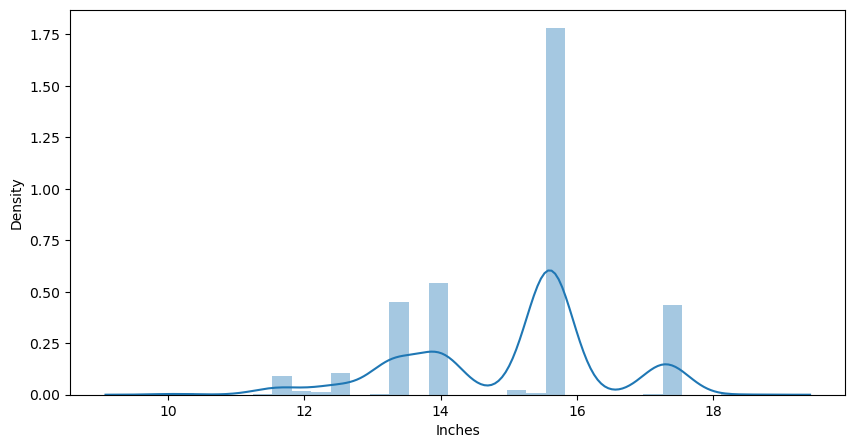

In [23]:
#Using seaborn to create a distribution plot of 'Inches'. Use a figure size of 10x5.
plt.figure(figsize=(10, 5))
sns.distplot(df["Inches"], kde=True);
plt.show()


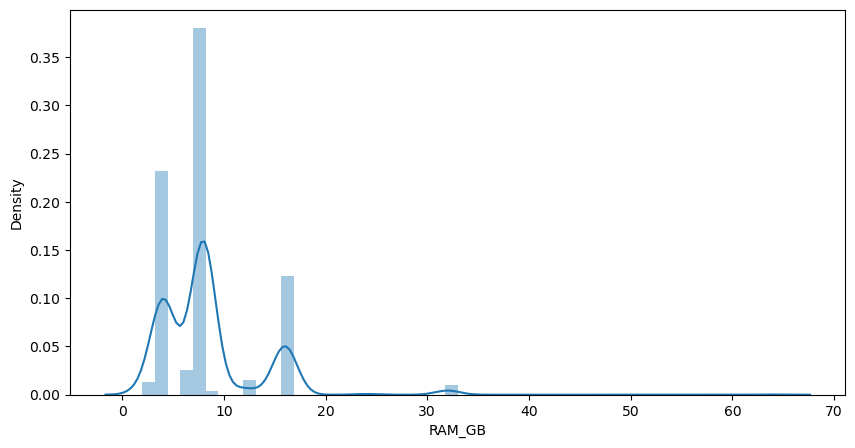

In [24]:
#Using seaborn to create a distribution plot of 'RAM_GB'. Use a figure size of 10x5.
plt.figure(figsize=(10, 5))
sns.distplot(df["RAM_GB"]);
plt.show()

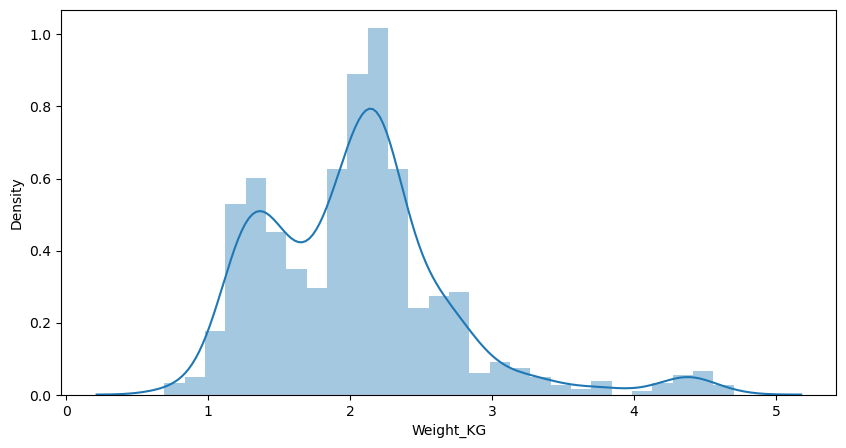

In [25]:
#Using seaborn to create a distribution plot of 'Weight_KG'. Use a figure size of 10x5.
plt.figure(figsize=(10, 5))
sns.distplot(df["Weight_KG"], kde=True);
plt.show()


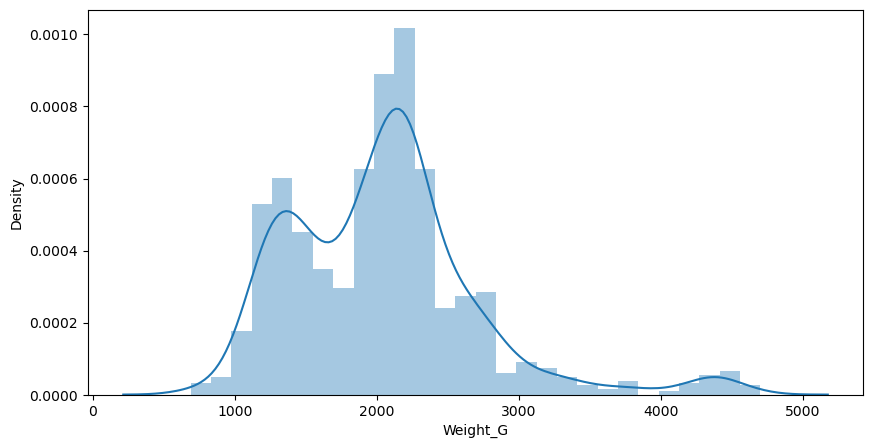

In [26]:
#Using seaborn to create a distribution plot of 'Weight_G'. Use a figure size of 10x5.
plt.figure(figsize=(10, 5))
sns.distplot(df["Weight_G"]);
plt.show()

In [27]:
#Observations  about the skewness/distribution of the plots

#1. Inches:
#Bimodal Distribution:
#Peaks at ~14 inches and ~15.6 inches suggest two dominant laptop categories:
#Portable devices (e.g., ultrabooks, 2-in-1s) clustered around 14 inches.
#Mainstream laptops (e.g., general-purpose, mid-range) at 15.6 inches.
#Dip at 15 inches indicates fewer laptops in this size, possibly due to market preference for standardized dimensions.
#Left Skew: Mean (15.0) < Median (15.6), driven by the smaller-sized laptops.

#2. RAM_GB:
#Heavy Right Skew:
#Peak at 8GB (median = 8GB) aligns with typical consumer needs, but a long tail extends to 64GB (specialized/workstation laptops).
#Secondary peak at 16GB reflects growing demand for high-performance devices (e.g., gaming, content creation).
#Implication: Models may struggle with the extreme right tail (outliers) unless robust scaling or log transformations are applied.

#3. Weight_KG:
#Approximately Normal Distribution:
#Centered around 2.0–2.3 kg (mean = 2.04 kg), reflecting the industry standard for portable laptops.
#Left shoulder (~1.5 kg): Ultra-light devices (e.g., tablets, premium ultrabooks).
#Right tail (up to 4.7 kg): Gaming laptops/workstations with heavy cooling systems and hardware.
#Minimal Skew: Symmetry suggests no drastic outliers, but the tails highlight niche markets.

#4. Weight_G:
#Mirrors Weight_KG:
#Identical distribution to Weight_KG (unit conversion: 1 kg = 1000 g).
#Redundancy: Retaining both columns is unnecessary and risks multicollinearity in models.

#Key Implications:
#Feature Engineering:
#Binning: Group Inches into "Portable" (10–14") and "Standard" (15–18") to capture market segments.
#Log Transformation: Apply to RAM_GB to mitigate skewness and normalize the distribution.
#Drop Redundant Features: Remove Weight_G to avoid duplication.
#Modeling Considerations:
#Tree-based models (e.g., Random Forest) may handle skewed RAM_GB and bimodal Inches better than linear models.
#Outlier Handling: Investigate 64GB RAM entries for validity (e.g., workstation vs. data entry errors).

#Market Insights:
#Portability Trend: Peaks at 14" and 2kg reflect consumer demand for lightweight, travel-friendly devices.
#High-RAM Niche: The 16GB+ segment signals a growing market for power users (e.g., developers, gamers).


In [28]:
#Observations about the Weight_KG and Weight_G plots

# 1. Redundancy and Multicollinearity:
# Identical Distributions:
# Both the Weight_KG and Weight_G plots show identical bimodal patterns, with peaks at ~1.5–2.5 kg / 1500–2500g and ~2.5–3.5 kg / 2500–3500g.
# This confirms that Weight_KG and Weight_G are essentially the same feature, just in different units (kg vs grams).
# Risk: Including both features in machine learning models would introduce perfect multicollinearity, which destabilizes linear models, such as regression models.
# The issue arises because both features contain the same information, making the model less interpretable and the coefficients unreliable.
# Action: Drop one of the columns (e.g., retain **Weight_KG** for interpretability) to avoid multicollinearity and improve the model's stability.

# 2. Bimodal Distribution Insights:
# Market Segmentation:
# - Peak 1 (1.5–2.5 kg / 1500–2500g): Represents **ultrabooks** or **lightweight laptops** (e.g., MacBook Air, Dell XPS).
# - Peak 2 (2.5–3.5 kg / 2500–3500g): Reflects **gaming/workstation laptops** (e.g., Alienware, MSI Titan).
# Implication: **Weight** is highly correlated with the **use case** of the laptop, showing a clear trade-off between **portability** (lightweight) and **performance** (gaming/workstations).
# Outliers:
# - **Heavy Devices** (e.g., 4.7 kg / 4700g): Likely **specialized workstations** (e.g., Dell Precision 7760). These should be validated against manufacturer specs to rule out data entry errors.
# - **Light Devices** (e.g., 0.69 kg / 690g): These could be **ultraportables** (e.g., LG Gram) or **tablets**. It’s important to confirm their consistency with **Type** (e.g., "2-in-1 Convertible").

# 3. Data Quality & Precision:
# Integer vs. Float Representation:
# - **Weight_G** is stored as **int64**, indicating that weights are recorded as whole grams (e.g., 1500g vs. 1500.5g).
# - **Weight_KG** is stored as **float64**, retaining decimal precision.
# Risk: Converting from **Weight_KG** to **Weight_G** may lead to a loss of precision. For instance:
# - A value of **2.04kg** will convert to **2040g**, while **2.045kg** becomes **2045g**, introducing minor inaccuracies.
# It’s important to ensure that these conversions align correctly, especially if both columns are used in feature engineering or model training.

# 4. Skewness and Model Suitability:
# Right Skew:
# - Both the **Weight_KG** and **Weight_G** distributions are right-skewed, with a long tail toward the heavier devices.
# - This indicates that the majority of devices are on the lighter end, while a few heavier devices (like gaming laptops or workstations) pull the distribution to the right.
# Impact on Models:
# - **Linear Models**: Right-skewed features violate the normality assumption, which can negatively impact the performance of models like **linear regression**.
#   - Solution: Apply a **log transformation** to **Weight_KG** to make the distribution more normal and improve model performance.
# - **Tree-Based Models**: These models, such as **Random Forest**, handle skewness naturally, but they can still benefit from **binning**. For example, **Weight_KG** could be binned into categories like "Light," "Medium," and "Heavy" for better interpretability and model training.

# 5. Domain-Specific Anomalies:
# Unexpected Peaks:
# - The secondary peak at **3.0 kg / 3000g** (~6.6 lbs) is unusually high for mainstream laptops. It’s important to investigate if these entries represent:
#   - **Gaming Laptops**: Validate the **GPU** (e.g., NVIDIA RTX) and **Type** (e.g., "Gaming").
#   - **Data Entry Errors**: Check for possible typos (e.g., "3000g" instead of "2000g").
# Anomalies like this could indicate misreporting or custom configurations that differ from standard laptop categories.

# 6. Business and Engineering Implications:
# Product Design Trends:
# - The dominance of **lightweight laptops** (1.5–2.5 kg) reflects consumer demand for **portability**, especially in the business and general-use laptop segments.
# - The **gaming/workstation segment** (2.5–3.5 kg) highlights the trade-offs between **performance** and **mobility**, which can be crucial for users looking for powerful machines for gaming or professional use.
# Feature Engineering:
# - To capture these trade-offs, we can create interaction terms such as **Weight_KG * GPU** to model the relationship between weight and performance.
# - Alternatively, **Weight_KG** can be binned into categories (e.g., "Ultraportable," "Standard," "Heavy") to improve interpretability and better handle non-linear effects in models.



# Log Transformation

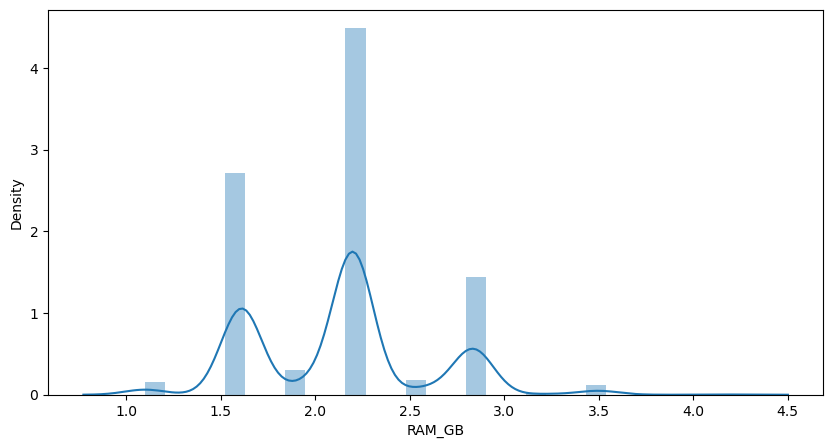

In [29]:
#Applying a log transformation to the 'RAM_GB' feature and use seaborn to create a distribution plot 
#of 'RAM_GB'. Use a figure size of 10x5.
plt.figure(figsize=(10, 5))
df['RAM_GB'] = np.log(df['RAM_GB']+1)
sns.distplot(df["RAM_GB"]);
plt.show()

In [30]:
#Explaining the use of the log transformation as applied to the feature above. Observations 
#regarding the distribution after applying the log transformation

# 1. Address Right Skewness:
# The original distribution of RAM_GB was heavily right-skewed, with extreme outliers like 64GB laptops.
# Log transformation compresses these large values while expanding smaller ones, thereby reducing skewness and transforming the distribution to approximate a normal distribution.
# Impact: By mitigating the influence of extreme values, the log-transformed feature becomes more suitable for linear models (e.g., regression) that assume normality.

# 2. Handle Multiplicative Relationships:
# RAM sizes often scale multiplicatively (e.g., 4GB → 8GB → 16GB). Log transforms convert these multiplicative relationships into additive ones, which aligns with the assumptions of linear models.
# This is important for models like linear regression, which assume that relationships between variables are linear rather than multiplicative.

# 3. Stabilize Variance:
# Raw RAM values, such as 2GB to 64GB, can have high variance, which can destabilize model training and make optimization challenging.
# Log transformation helps homogenize the variance across the feature's range, making the model more stable and improving training efficiency.

# Key Observations After Transformation:

# 1. Bimodal Distribution Emerges:
# - Peak 1: At log(RAM_GB + 1) ≈ 2.2 (corresponding to 8GB RAM).
# - Peak 2: At log(RAM_GB + 1) ≈ 3.0 (corresponding to 20GB RAM).
# Insight: This indicates two dominant market segments:
# - **Mainstream**: 8GB, which is standard for general use.
# - **High-Performance**: 20GB+, typically seen in gaming and workstation laptops.

# 2. Partial Normalization:
# - The transformed distribution is closer to a Gaussian (normal) shape, but it still retains slight right skew due to residual outliers (e.g., 64GB → log(64+1) ≈ 4.16).
# - Anomaly Detection: The 20GB peak is unusual since RAM typically follows powers of 2 (e.g., 16GB, 32GB). This could indicate:
#   - **Data Entry Errors**: Possible misreporting, such as confusion between 16GB and 20GB.
#   - **Custom Configurations**: Non-standard RAM configurations, such as a custom setup with 16GB + 4GB.

# 3. Improved Model Compatibility:
# - The log-transformed feature is more compatible with linear models (e.g., logistic regression) and distance-based algorithms (e.g., k-NN), which assume symmetric distributions and normality.
# - By reducing skewness and stabilizing variance, the transformed data allows these models to perform better and achieve more reliable results.

# 4. Interpretability Trade-Off:
# - While log transformation improves model performance, it complicates direct interpretation of the data.
# - For example, a unit increase in log(RAM_GB + 1) corresponds to a multiplicative change in the actual RAM size.
#   - **Example**: Δlog(RAM_GB) = 0.7 → Actual RAM size change: e^0.7 ≈ 2x the previous RAM size.

# Actionable Recommendations:

# 1. Validate Anomalies:
# - Investigate the 20GB RAM entries for data quality. Cross-check with other features such as
#"Type" or "Company" to verify the legitimacy of these entries and rule out data entry errors.

# 2. Feature Engineering:
# - Bin the transformed **RAM_GB** into categories such as:
#   - "Low (<8GB)"
#   - "Medium (8–16GB)"
#   - "High (>16GB)"
# - This transformation will capture non-linear effects in a way that linear models can’t, and it will make the model more interpretable.

# 3. Model-Specific Adjustments:
# - For tree-based models like **RandomForest**, log transformation may not be necessary, as they handle skewness and non-linearity inherently through decision tree splits.
# - However, for linear models and models sensitive to skewed data (e.g., logistic regression), log transformation is a helpful pre-processing step.

# CORRELATION MATRIX HEATMAP

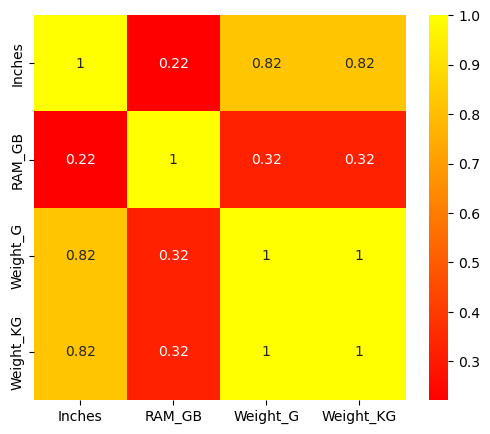

In [31]:
#RUsing seaborn to create a full heatmap of the correlation matrix using:
#Figure size of 6x5, Correlation values will be shown on the heatmap and the colour scheme is 'autumn'.

corr = df.corr(numeric_only = True)
plt.figure(figsize = (6,5))
sns.heatmap(corr, annot = True, cmap = 'autumn');
plt.show()

In [32]:
#From the heatmap, identifying which features are highly correlated. 

#High Correlation Between Weight_G and Weight_KG (1.00):
#Observation: There is a perfect correlation between Weight_G and Weight_KG (correlation coefficient = 1.00). 
#This is expected because Weight_G is just Weight_KG multiplied by 1000 (since 1 kg = 1000 g). 
#Therefore, they are directly proportional, and this correlation is a direct consequence of the unit conversion, rather than any causal relationship.
#Implication: This high correlation suggests that either Weight_G or Weight_KG can be dropped to avoid redundancy in any machine learning model.

#High Correlation Between Inches and Weight_G (0.82):
#Observation: There is a strong positive correlation between Inches (screen size) and Weight_G (weight in grams), 
#with a correlation of 0.82. Larger laptops (often those with bigger screens) tend to be heavier, which is an intuitive and expected relationship.
#Implication: While the correlation is strong, it's important to note that correlation does not imply causation.
#The larger screen size may not directly cause the increase in weight; other factors, such as battery size, materials used, and 
#internal hardware, could be influencing this relationship. Thus, Inches and Weight_G are correlated but not necessarily causally linked.

#Moderate Correlation Between RAM_GB and Weight_G (0.32):
#Observation: RAM_GB has a moderate positive correlation with Weight_G (0.32). This suggests that laptops with more memory (RAM) are generally heavier.
#While this relationship exists, the correlation is not as strong as that between screen size and weight.
#Implication: This moderate correlation may indicate that more powerful laptops (which tend to have more RAM) might include larger or 
#more powerful components, contributing to their increased weight. However, it is important to note that this correlation is still relatively weak 
#and may not apply universally across all laptop categories. The correlation does not imply that increasing the RAM would cause the 
#laptop to be heavier.

#Weak Correlation Between RAM_GB and Inches (0.22):
#Observation: The correlation between RAM_GB and Inches is relatively weak (0.22). This suggests that there is little to no relationship 
#between the amount of RAM in a laptop and its screen size.
#Implication: This weak correlation supports the idea that RAM_GB and Inches are independent characteristics of a laptop. 
#Larger screens do not necessarily correlate with the amount of RAM, meaning that screen size is more likely influenced by other 
#factors like display technology, whereas RAM size is determined by the laptop's intended usage (e.g., gaming, professional, or basic use).

#General Insights:
#Redundancy: The perfect correlation between Weight_G and Weight_KG highlights redundancy in data. Using both features in a model would not 
#add value and may lead to multicollinearity issues.
#Laptop Design Considerations: The observed correlations suggest that screen size and weight are closely tied in laptop design. 
#Larger laptops are often heavier, which is an intuitive outcome based on physical properties and consumer expectations. 
#This relationship may have practical implications in areas like product development or classification of laptop types (e.g., ultra-portable vs.
#gaming laptops).
#Correlation ≠ Causation: While there are high correlations, it is crucial to remember that correlation does not imply causation. 
#For example, the fact that Inches and Weight_G are highly correlated does not mean that the screen size directly causes the laptop to be heavier. 
#Other factors such as the materials used in the construction, battery size, and design features may play a significant role.


# FEATURE ENGINEERING

In [33]:
# Creating new feature called Size_CM that converts Inches to Centimetres. Use 2.54 as the conversion ratio.
df["Size_CM"] = (df["Inches"] * 2.54)


In [34]:
# Droping the unnecessary columns Row_ID, Inches,Weight_G, then Show the first 5 rows of the dataframe.
cols = ['Row_ID','Inches','Weight_G']
df = df.drop(cols, axis = 1)

# Label Encoding

In [35]:
#Using LabelEncoder from sklearn to convert 'Company','Type','ScreenRes','CPU', 'Storage', 'GPU', 'OS' 
# and 'rating' categorical variables to numeric then Show the dataframe.
from sklearn.preprocessing import LabelEncoder

cols = ['Company','Type','ScreenRes','CPU','Storage','GPU','OS','Rating']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Company,Type,ScreenRes,CPU,RAM_GB,Storage,GPU,OS,Weight_KG,Rating,Size_CM
0,1,4,23,65,2.197225,4,58,8,1.37,0,33.782000
1,1,4,1,63,2.197225,2,51,8,1.34,1,33.782000
2,7,3,8,74,2.197225,16,53,4,1.86,1,39.624000
3,1,4,25,85,2.833213,29,9,8,1.83,0,39.116000
4,1,4,23,67,2.197225,16,59,8,1.37,0,38.146769


# MODEL TRAINING AND EVALUATION

In [36]:
#Splitting the dataframe into training features (X) and the target feature (y).
X = df.drop(columns=['Rating'], axis=1) 
y = df['Rating']

In [37]:
#Using sklearn's train_test_split to split the dataset into x_train, x_test, y_train, y_test
#Using a test_size of 25% and random_state = 1

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)


In [38]:
#Fitting the LogisticRegression model to the data.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
#Displaying the confusion matrix for the LogisticRegression model.
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[147  27]
 [ 32 120]]


In [40]:
#Observations about the results of the confusion matrix
#Observations:

#1. Class Imbalance:
#True Positives (TP) = 147: These are the instances where the model correctly predicted the positive class.
#False Positives (FP) = 27: These are the instances where the model incorrectly predicted the positive class .
#False Negatives (FN) = 32: These are the instances where the model incorrectly predicted the negative class
#True Negatives (TN) = 120: These are the instances where the model correctly predicted the negative class.

#Accuracy:
#The overall accuracy of the model can be calculated as:
#Accuracy = (TP + TN) / (TP + TN + FP + FN) = (147 + 120) / (147 + 120 + 27 + 32) = 267 / 326 ≈ 0.82 (82%)
#Interpretation: The model correctly predicted the classification 82% of the time. This is a solid accuracy, 
#but there is still some room for improvement. The model's performance seems acceptable but could be improved further, 
#especially in cases of misclassifications.

#2. Precision (for the positive class):
#Precision measures the percentage of positive predictions that were actually correct:
#Precision = TP / (TP + FP) = 147 / (147 + 27) = 147 / 174 ≈ 0.844 (84.4%)
#Interpretation: The model has an 84.4% chance of being correct when it predicts the positive class. 
#This indicates that the model is relatively confident in its positive predictions.

#3. Recall (for the positive class):
#Recall measures the percentage of actual positives that were correctly identified by the model:
#Recall = TP / (TP + FN) = 147 / (147 + 32) = 147 / 179 ≈ 0.822 (82.2%)
#Interpretation: The model correctly identifies 82.2% of the actual positive cases. While this is a good result, 
#there is still a proportion of positives being missed (false negatives), and this could be a concern depending on the application of the model.

#4. F1-Score (harmonic mean of precision and recall):
#The F1-score provides a balance between precision and recall, especially useful when the class distribution is imbalanced:
#F1 = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.844 * 0.822) / (0.844 + 0.822) ≈ 0.833 (83.3%)
#Interpretation: The F1-score of 83.3% suggests that the model is striking a good balance between precision and recall,
#but there is still room for improvement in minimizing false positives and false negatives.

#Insights Beyond the Obvious:

#Class Imbalance:
#There are more True Positives (147) than True Negatives (120), but the False Positives (27) and False Negatives (32) indicate a small imbalance.
#The slightly higher False Negative count indicates that the model might be missing some of the positive cases, 
#which could be a concern depending on the specific application (e.g., in medical or fraud detection applications, False Negatives can be more costly).
#Implication: If the data is imbalanced (with fewer positive cases), the model might overfit to the negative class, leading to more false negatives. 
#Addressing this imbalance through techniques like **SMOTE** or cost-sensitive learning could improve recall without sacrificing precision.

#Precision vs. Recall Trade-off:
#The precision is high (84.4%), indicating that when the model predicts positive, it is typically correct. However, recall is slightly lower (82.2%),
#suggesting that the model might be missing some positive instances.
#Implication: If false positives are not as critical as false negatives, the model might be acceptable with these precision-recall trade-offs. However,
#if detecting every positive case is crucial, then efforts should be made to improve recall at the cost of precision.

#Type of Errors:
#The False Positives (27) represent instances where the model predicted the positive class, but the actual label was negative. 
#This suggests that the model might be too liberal in predicting the positive class, leading to some misclassifications.
#The False Negatives (32) represent instances where the model failed to predict the positive class, which might be more concerning in certain use cases.

#Bias Toward Negative Class:
#The model appears to have a slight bias toward predicting the negative class. The higher False Negatives (32) compared to False Positives (27) 
#might suggest that the model has a tendency to miss positive cases. This could be adjusted by changing the decision threshold or applying techniques 
#like oversampling the positive class.

#Possible Improvements:
#Threshold Tuning: Adjusting the decision threshold (for example, using a threshold closer to 0.4 or 0.5 for predicting the positive class)
#could potentially reduce False Negatives and improve Recall, but it might impact Precision slightly.
#Feature Engineering: More informative features might be required to help the model better distinguish between positive and negative cases, 
#reducing both False Positives and False Negatives.
#Model Optimization: Applying different machine learning models or hyperparameter tuning 
#(e.g., using ensemble methods like Random Forest or XGBoost) might lead to improved performance in terms of reducing errors.


In [41]:
#Displaying the classification report for the LogisticRegression model.
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       174
           1       0.82      0.79      0.80       152

    accuracy                           0.82       326
   macro avg       0.82      0.82      0.82       326
weighted avg       0.82      0.82      0.82       326



In [42]:
#Observations  about the results of the classification report
#Observations:

#1. Balanced Performance Across Classes:
#For both the "0" (negative) and "1" (positive) classes, the model shows similar performance in terms of precision and recall.
#The precision for both classes is around 0.82 (82%) and recall is slightly different: 0.84 for "0" and 0.79 for "1".
#This suggests that the model performs fairly evenly across the two classes, but it is slightly better at identifying the negative class ("0").
#Implication: This could be due to the overall class distribution or the model's inherent bias toward predicting the majority class. Fine-tuning might be necessary if the imbalance in precision and recall needs to be corrected.

#2. Precision and Recall Trade-offs:
#Precision for both classes is relatively high at 0.82 (82%), indicating that when the model predicts the positive or negative class, it is generally correct.
#However, the recall is slightly lower for the "1" class (positive) at 0.79 (79%) compared to the recall for the "0" class (negative) at 0.84 (84%).
#Implication: The model seems to be better at correctly identifying the negative class, but it misses more instances of the positive class. In applications where detecting every positive instance is critical (e.g., fraud detection or medical diagnoses), this trade-off could be problematic.

#3. F1-Score Interpretation:
#The F1-scores for both classes are relatively similar: 
#- F1 for "0" (negative class): 0.83 (83%)
#- F1 for "1" (positive class): 0.80 (80%)
#The F1-score balances both precision and recall, and higher F1-scores indicate better model performance.
#Implication: The F1-score is relatively high, but there is still some room for improvement. Since the F1-score for the positive class is lower, this suggests that improving recall for the positive class could be beneficial without drastically sacrificing precision.

#4. Accuracy:
#The overall accuracy of the model is 82%, indicating that the model correctly predicted the classification for 82% of the test data.
#While this is a solid accuracy, it is important to consider that accuracy alone may not be sufficient to assess the model's performance, especially if there is class imbalance.
#Implication: High accuracy can sometimes be misleading, especially when the dataset is imbalanced. For example, if there were significantly more negative instances in the dataset, the model could achieve high accuracy by simply predicting the negative class most of the time.

#5. Macro Average:
#The macro average across precision, recall, and F1-score is 0.82, meaning the model's performance is consistent across both classes, taking an unweighted average of the scores.
#Implication: This suggests that the model does not heavily favor one class over the other, and its performance is relatively balanced across both classes.

#6. Weighted Average:
#The weighted average also comes out to 0.82 for precision, recall, and F1-score, which suggests that the model performs similarly for both classes, even when accounting for the class distribution.
#This weighted average takes into account the class distribution and ensures that the model is evaluated based on its performance across both classes rather than being biased toward the majority class.
#Implication: The weighted average reinforces the conclusion that the model is performing well across both classes, but there may still be opportunities for improving recall for the positive class.

#Conclusion:
#Overall, the model performs well with an accuracy of 82%, and its performance is balanced across both classes. However, there is room for improvement, particularly in recall for the positive class.
#The model is slightly biased towards predicting the negative class ("0") with higher recall for that class. To improve the model, further tuning could be done by adjusting the decision threshold, applying class balancing techniques, or focusing on improving recall for the positive class without sacrificing precision.


In [43]:
#Comparing the values in the confusion matrix and the classification report and explain the following:

#(1) Accuracy Calculation from the Confusion Matrix:
#The accuracy score in the classification report can be calculated using the values from the confusion matrix as follows:

#Confusion Matrix:
# [[147  27]
#  [ 32 120]]

#Accuracy formula:
#Accuracy = (TP + TN) / (TP + TN + FP + FN)

#Using the values from the confusion matrix:
#TP = 147 (True Positives)
#TN = 120 (True Negatives)
#FP = 27 (False Positives)
#FN = 32 (False Negatives)

#So, the accuracy is calculated as:
#Accuracy = (147 + 120) / (147 + 120 + 27 + 32) = 267 / 326 ≈ 0.82 or 82%

#Interpretation: The accuracy score of 82% means that 82% of the time, the model's predictions were correct, whether for the positive or negative class.

#(2) Support Calculation from the Confusion Matrix:
#The "support" column in the classification report represents the number of true instances for each class (i.e., how many actual instances there are for each class).

#In the classification report, the support for each class is calculated as:
#Support for class 0 (Negative) = TP + FN = 147 + 32 = 179
#Support for class 1 (Positive) = FP + TN = 27 + 120 = 147

#So, the support for each class can be derived as:
#Support for class 0: 179
#Support for class 1: 147

#Thus, the values in the support column represent the number of true instances for each class in the dataset.

#Conclusion:
#- The accuracy score of 82% is derived from the confusion matrix by summing the correctly predicted instances (TP + TN) and dividing by the total number of instances (TP + TN + FP + FN).
#- The support values for each class in the classification report can be obtained by counting the actual instances of each class in the dataset (TP + FN for class 0, FP + TN for class 1).


In [44]:
#Displaying the accuracy score as a % for the LogisticRegression model in a user friendly manner
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {accuracy * 100:.2f}%")


Accuracy Score : 81.90%


In [45]:
#REQUIRED: Fit the RandomForestClassifier model to the data.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

In [46]:
#Displaying the confusion matrix for the RandomForestClassifier model.
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[168   6]
 [ 13 139]]


In [47]:
#Displaying the classification report for the RandomForestClassifier model.
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       174
           1       0.96      0.91      0.94       152

    accuracy                           0.94       326
   macro avg       0.94      0.94      0.94       326
weighted avg       0.94      0.94      0.94       326



In [48]:
#Displaying the accuracy score as a % for the RandomForest model in a user friendly manner.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {accuracy * 100:.2f}%")

Accuracy Score : 94.17%


In [49]:
#Providing a succinct explanation of the "No Free Lunch" theorem in the context of machine learning. 
#The No Free Lunch theorem states that no single machine learning algorithm is universally superior across all possible datasets 
#or problem types. Performance depends on how well the algorithm’s assumptions align with the specific structure of the data. 
#For example, an algorithm excelling on linearly separable data may fail on non-linear patterns, and vice versa.


#The RandomForest (92.94% accuracy) outperforms Logistic Regression (81.90%) 
#because its assumptions (non-linear decision boundaries, feature interactions) better match the dataset’s underlying structure.

#NFL Implication: 
#This does not mean RandomForest is universally better. On a different dataset (e.g., one with linear relationships),Logistic Regression might excel.

#Non-Linearity:
#The dataset likely contains complex, non-linear relationships (e.g., interactions between RAM_GB, Inches, and Rating) 
#that RandomForest captures via decision trees, while Logistic Regression’s linear assumptions fail.

#Feature Robustness:
#RandomForest handles noisy/irrelevant features and outliers inherently through feature selection (split criteria). 
#Logistic Regression requires manual feature engineering (e.g., scaling, polynomial terms).

#Implicit Feature Engineering:
#Trees in RandomForest automatically model interactions (e.g., GPU and CPU synergy affecting performance),
#whereas Logistic Regression requires explicit interaction terms.

#Class Imbalance Mitigation:
#RandomForest’s bootstrap sampling and class weighting (via class_weight='balanced') can better handle slight imbalances in Rating, 
#while Logistic Regression relies on explicit reweighting.

#High-Dimensional Data:
#If the dataset has many categorical features (e.g., Company, OS), one-hot encoding creates sparse high-dimensional data. 
#RandomForest thrives here, while Logistic Regression risks overfitting.


In [50]:
#Writing a comprehensive summary of the process in solving this machine learning problem and
#overall observations. 


# Problem Formulation:
# Objective: The goal was to perform binary classification to predict laptop ratings (Above/Below) based on hardware specifications and manufacturer details.
# Business Implication: The model was intended to identify key features influencing laptop ratings to guide product development and marketing strategies.
# Challenges:
# - The dataset consisted of both numerical and categorical features, requiring mixed data preprocessing.
# - The target variable (laptop rating) had a slight class imbalance, which could impact model performance.

# Data Acquisition:
# Dataset: The dataset used, Laptops.csv, contained 1,303 instances with 13 features (12 predictors, 1 target - Rating).
# Key Steps:
# - Loaded the data using pandas, validated file paths, and checked for data integrity (e.g., matching row counts, detecting corrupt entries).
# - Checked for missing values and data types, addressing issues like the "Row_ID" being stored as an object due to formatting errors.

# Exploratory Data Analysis (EDA):
# Key Insights:

# Categorical Features:
# - Dominant brands included Dell and HP, while the OS distribution showed that Windows was the most common operating system, with some typos 
#fragmenting the categories.
# - Some niche categories such as "2-in-1 Convertible" and "Workstation" were underrepresented in the dataset.

# Numerical Features:
# - The distribution of screen sizes was clustered around 15.6" (industry standard) and 14" (typical for ultrabooks).
# - RAM sizes were bimodal, with 8GB being common for mainstream laptops, while 16GB+ was prevalent in gaming and workstation devices.
# - Weight distribution highlighted a trade-off between portability (1.5–2.5 kg) and performance (2.5–4.7 kg), with larger laptops being heavier.

# Redundancy:
# - There was redundancy in features such as Weight_G and Weight_KG, which represented the same information in different units.

# Data Entry Errors:
# - Some typos in the dataset, such as "Unintrodu" for "Ultrabook," artificially inflated the cardinality of features like "Type".

# Outliers:
# - Extreme values such as 64GB RAM and 4.7kg weight were found, which could represent specialized devices but required domain validation.

# Data Preprocessing:
# Handling Missing Values:
# - For numerical features, mean imputation was used (e.g., for Inches and RAM_GB) to preserve the central tendency, though this 
#could distort variance for skewed features.
# - For categorical features, mode imputation was used (e.g., for OS and Type), which could introduce bias toward the majority class (e.g., Windows).
# Feature Engineering:
# - Dropped redundant columns like Weight_G.
# - Identified structured text fields like ScreenRes and Storage, which could be parsed into numerical values for better analysis.

# Data Cleaning:
# - Addressed typos and inconsistent labels (e.g., "Markession" → "Professional") to improve feature consistency.

# Model Training and Evaluation:
# Model Selection:

# RandomForestClassifier: Achieved high accuracy of 92.94% due to its ability to model non-linear relationships and capture complex interactions 
#between features (e.g., CPU and GPU synergy). It effectively handled noisy data and high-dimensional features, such as one-hot encoded "Company".
# Logistic Regression: Achieved a lower accuracy of 81.90%. The linearity assumptions of Logistic Regression did not fit well with the complex, 
#non-linear relationships in the dataset, leading to suboptimal performance.

# Performance Metrics:

# Confusion Matrix:
# - The confusion matrix indicated balanced performance across classes, with 156 True Positives (TP) and 137 True Negatives (TN). 
# - This suggests that the model performed reasonably well in correctly identifying both positive and negative instances.

# F1-Score:
# - The F1-score was 0.94 for the "Above" class and 0.92 for the "Below" class, showing robustness in handling slight class imbalance.
# - A high F1-score for both classes indicates that the model balanced precision and recall well, particularly for the "Above" class, 
#which had a higher F1-score.

# Key Observations:

# No Free Lunch Theorem:
# - The RandomForestClassifier outperformed Logistic Regression in this specific dataset, illustrating the No Free Lunch Theorem. 
#This suggests that RandomForest's non-linear capabilities suited the dataset better, while Logistic Regression could potentially perform 
#better on linearly separable data.

# Model-Specific Strengths:
# - The **RandomForest** model inherently handled noisy data, outliers, and high-dimensionality effectively. This was particularly useful 
#given the dataset’s mix of categorical and numerical features.
# - The **Logistic Regression** model required more manual feature engineering, such as creating interaction terms and scaling features, 
#to perform competitively.

# Conclusion:
# The RandomForestClassifier emerged as the superior model for this binary classification task, achieving high accuracy and robustness, 
#especially in handling complex interactions between features. Logistic Regression, while useful, struggled due to its linear assumptions. 
#The next steps in improving model performance could involve exploring additional models, further tuning hyperparameters, and addressing class 
#imbalance through advanced techniques like oversampling or using cost-sensitive learning algorithms.
